## 590D - Algorithms for Data Science = >   Mini Exercise 3

In [93]:
import numpy as np
import random
import sys
import matplotlib.pyplot as plt

In [94]:
def generateData(c):
    xa = []
    ya = []
    xb = []
    yb = []
    for i in range(c):
        xa.append((random.random()*2-1)/2-0.5)
        ya.append((random.random()*2-1)/2+0.5)
        xb.append((random.random()*2-1)/2+0.5)
        yb.append((random.random()*2-1)/2-0.5)
    data = []
    for i in range(len(xb)):
        data.append([xa[i],ya[i],1])
        data.append([xb[i],yb[i],-1])
    return data

In [95]:
def margin_calculation(points, weights):
    
    temp = np.sqrt(np.sum(weights**2))
    int_min= sys.float_info.max
    for index in range(points.shape[0]):
        margin = np.sum(points[index] * weights)
        margin=margin/temp
        if margin < int_min:
            int_min = margin
    #print "\n\n MARGIN VALUES\n\n"
    print(margin)

In [96]:
def graph_plotting(data, weight_values):
        
    xa = []
    ya = []
    xb = []
    yb = []
    for point in data:
        if point[2] == 1:
            xa.append(point[0])
            ya.append(point[1])
        else:
            xb.append(point[0])
            yb.append(point[1])
    
    w_x = []
    w_y = []
    for weight in weight_values:
        w_x.append(weight[0])
        w_y.append(weight[1])
    
    plt.title('Perceptron Learning Algorithm')
    plt.scatter(xa, ya, color='g')
    plt.scatter(xb, yb, color = 'r')
    plt.scatter(w_x, w_y, color='b')
    plt.show()
    plt.close()

In [97]:
def get_coordinates(points, labels, weights):
    
    for iterator in range(points.shape[0]):
        if np.sum(points[iterator]*weights)*labels[iterator] <= 0:
            return False
    return True

In [98]:
def perceptron(examples):
    weights = []
    a = np.zeros((len(examples), 3))
    l = np.zeros((len(examples),))
    w = np.zeros((3,))
    for idx, point in enumerate(examples):
        a[idx][0] = point[0]*1.0
        a[idx][1] = point[1]*1.0
        a[idx][2] = 1
        l[idx] = point[2]
    
    w = np.reshape(a[0]*l[0],(3,))
    weights.append(np.copy(w))
    index = True
    while(index):
        index = random.randint(0, len(examples)-1)
        while(np.sum(a[index]*w)*l[index] > 0):
            index = random.randint(0, len(examples)-1)
        w += np.reshape(a[index]*l[index],(3,))
        weights.append(np.copy(w))
        if(get_coordinates(a, l, w) == True):
            index = False
    print("\nCalculated Weights = >\n");
    print(weights)
    graph_plotting(examples, weights)
    margin_calculation(a, w)


Calculated Weights = >

[array([-0.95911361,  0.29131544,  1.        ]), array([-1.35459034,  0.52299209,  0.        ])]


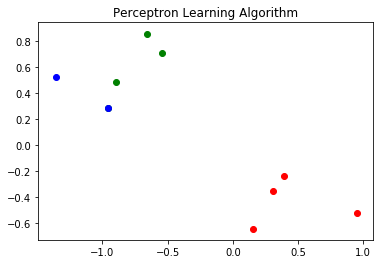

-0.452378439264

Calculated Weights = >

[array([-0.13837646,  0.52059612,  1.        ]), array([-0.24032994,  0.52266272,  0.        ])]


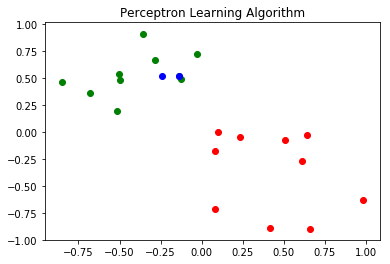

-0.138680544574

Calculated Weights = >

[array([-0.84176639,  0.72507737,  1.        ]), array([-1.31385786,  1.04043535,  0.        ])]


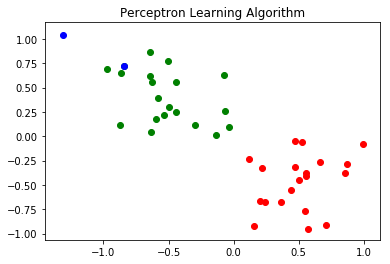

-0.689391174925


In [99]:
samples = [4, 10, 20]
for i in samples:
    examples = generateData(i)
    #print(examples)
    perceptron(examples)